<a href="https://colab.research.google.com/github/angelinakhatiwada/Urban-Sound-Classification/blob/main/Urban_Sound_Classification_Feature_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Urban Sound Classification

## Part 1: Dataset import and feature extraction

**Project for Machine Learning Course**

*Angelina Khatiwada*, \
*MSc, Data Science and Economics*

Dec 2021



In [1]:
# importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import os
import librosa
import librosa.display

In [6]:
# installing Kaggle library
# please upload your kaggle.json file with Kaggle API credentials manually to the files folder
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
#dataset link: https://www.kaggle.com/chrisfilo/urbansound8k
!  kaggle datasets download chrisfilo/urbansound8k

100% 5.59G/5.61G [01:58<00:00, 53.5MB/s]
100% 5.61G/5.61G [01:58<00:00, 50.7MB/s]


In [1]:
#! unzip urbansound8k.zip

In [10]:
metadata = pd.read_csv("UrbanSound8K.csv")
print(metadata.shape)
metadata.head(10)

(8732, 8)


,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


### Exploratory analysis

In [11]:
# no missing values in the metadata file
metadata.isnull().values.any()

False

In [12]:
# check if there are duplicate values in the metadata file
metadata.duplicated(subset=['slice_file_name']).any()

False

[Text(0, 0, 'dog_bark'),
 Text(0, 0, 'children_playing'),
 Text(0, 0, 'car_horn'),
 Text(0, 0, 'air_conditioner'),
 Text(0, 0, 'street_music'),
 Text(0, 0, 'gun_shot'),
 Text(0, 0, 'siren'),
 Text(0, 0, 'engine_idling'),
 Text(0, 0, 'jackhammer'),
 Text(0, 0, 'drilling')]

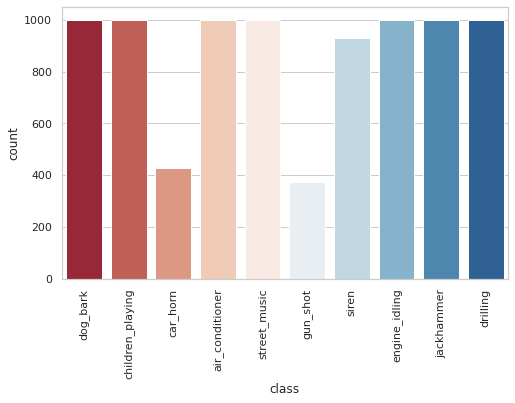

In [13]:
# check if the dataset is balanced

plt.figure(figsize = (8,5))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="class", data=metadata, palette="RdBu")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

In [14]:
# examples from each class
examples = ['100032-3-0-0.wav',
 '100263-2-0-117.wav',
 '100648-1-0-0.wav',
 '100852-0-0-0.wav',
 '101848-9-0-0.wav',
 '102305-6-0-0.wav',
 '102853-8-0-0.wav',
 '102857-5-0-0.wav',
 '103074-7-0-0.wav',
 '103199-4-0-0.wav']

In [15]:
# creating examples dataset
examples_df = metadata[metadata['slice_file_name'].isin(examples)]
examples_df

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn
22,100852-0-0-0.wav,100852,0.000000,4.000000,1,5,0,air_conditioner
94,101848-9-0-0.wav,101848,0.000000,4.000000,1,7,9,street_music
106,102305-6-0-0.wav,102305,0.000000,2.611610,1,1,6,gun_shot
114,102853-8-0-0.wav,102853,0.000000,4.000000,2,7,8,siren
122,102857-5-0-0.wav,102857,0.000000,4.000000,1,10,5,engine_idling
171,103074-7-0-0.wav,103074,3.341279,7.341279,1,1,7,jackhammer
196,103199-4-0-0.wav,103199,0.000000,4.000000,1,3,4,drilling


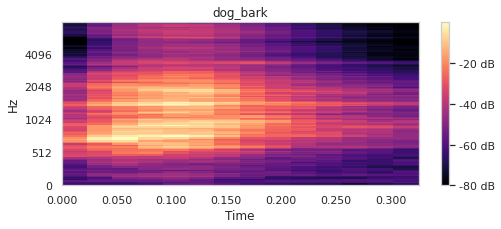

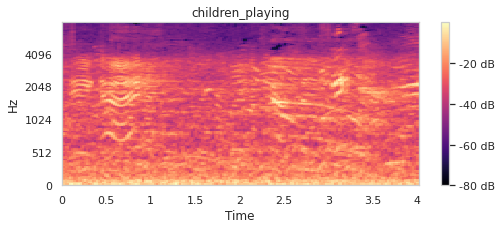

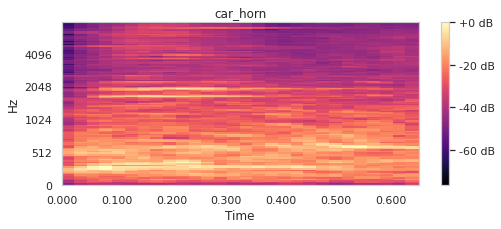

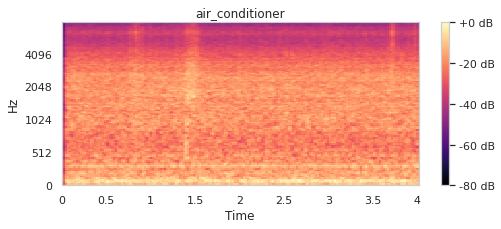

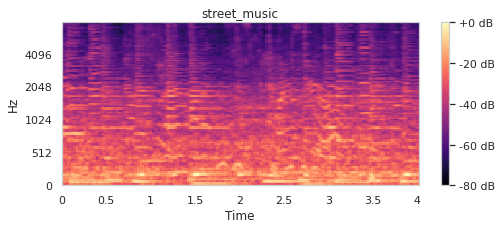

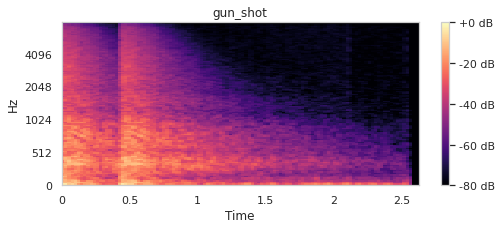

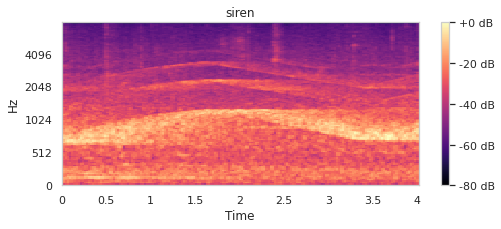

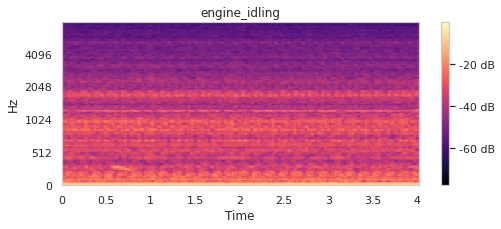

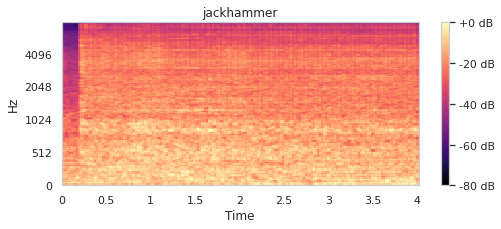

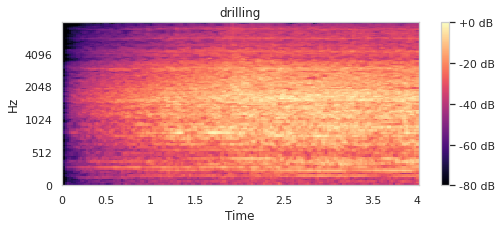

In [30]:
# exploring differences in frequencies for all the classes using melspectrogram
list_sound_files, list_sampling_rates = [], []
indices = examples_df.index.values.tolist()  

for i in indices:

  # extracting sound_file for 10 examples
  dir = 'fold' +str(examples_df['fold'][i]) +'/' + examples_df['slice_file_name'][i]
  sound_file, sampling_rate = librosa.load(dir)

  #plotting frequences
  S = librosa.feature.melspectrogram(y=sound_file, sr=sampling_rate)
  #D = librosa.amplitude_to_db(np.abs(librosa.stft(sound_file)), ref=np.max)

  fig, ax = plt.subplots(figsize=(8,3))
  S_dB = librosa.power_to_db(S, ref=np.max)
  
  #librosa.display.specshow(D, y_axis='linear')
  img = librosa.display.specshow(S_dB, x_axis='time',
                          y_axis='mel', sr=sampling_rate,
                          fmax=8000, ax=ax)
  
  fig.colorbar(img, ax=ax, format='%+2.0f dB')
  ax.set(title=(examples_df['class'][i]))      

## Feature extraction

### Example sound file: children playing

In [95]:
# example 
sound_file, sampling_rate = librosa.load("fold5/100263-2-0-117.wav")

mfccs = librosa.feature.mfcc(sound_file, sampling_rate)
melspectrogram =librosa.feature.melspectrogram(sound_file, sampling_rate)
chroma_stft=librosa.feature.chroma_stft(sound_file, sampling_rate)

mfccs.shape, melspectrogram.shape, chroma_stft.shape

((20, 173), (128, 173), (12, 173))

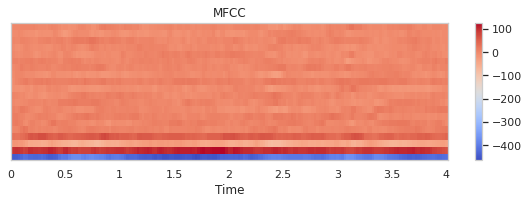

In [77]:
#MFCC of children playing
plt.figure(figsize=(8,3))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()

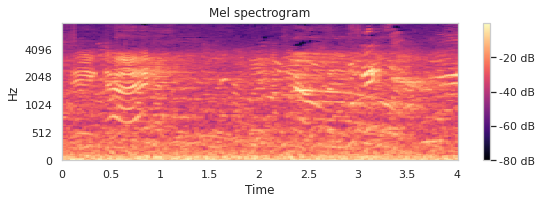

In [78]:
#Melspectrogram of children playing
plt.figure(figsize=(8,3))
librosa.display.specshow(librosa.power_to_db(melspectrogram,ref=np.max),
                         y_axis='mel',sr=sampling_rate,
                         fmax=8000,x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

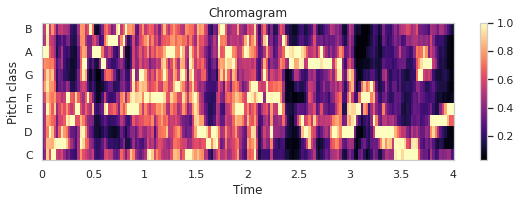

In [80]:
#Chromagram of of children playing
plt.figure(figsize=(8,3))
librosa.display.specshow(chroma_stft, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()

In [97]:
#feature set (mean)
mfccs = np.mean(mfccs.T,axis=0)
melspectrogram = np.mean(melspectrogram.T,axis=0)
chroma_stft=np.mean(chroma_stft.T,axis=0)

mfccs.shape, melspectrogram.shape,chroma_stft.shape,

((20,), (128,), (12,))

In [99]:
mfccs

array([-417.29105  ,  100.148506 ,  -43.869255 ,   51.953114 ,
          9.044406 ,    8.780206 ,   10.375921 ,    2.731388 ,
          6.175258 ,    5.0651426,   -4.3706613,   14.675569 ,
         -3.529977 ,    8.043687 ,    4.821468 ,    2.6133275,
          1.0505784,    7.758826 ,   -3.1387537,    4.103151 ],
      dtype=float32)

In [101]:
#stacking and reshaping
features = np.empty((0,160))
ext_features = np.hstack([mfccs, melspectrogram,chroma_stft])
features = np.vstack([features,ext_features])
features.shape

(1, 160)

### Feature extraction: entire dataset

Librosa library used to extract several useful features common in the field of sound events classification. Mel-frequency cepstral coefficients (MFCCs), Chromagram (with the librosa.feature.chroma_stft).

#### Melspectrogram

The dataset is provided with 10 predefined folds. Train the model on folds: 1, 2, 3, 4, 6, and test it on folds: 5, 7, 8, 9, 10.

In [107]:
def features_extraction(fold):
  df = metadata[metadata['fold'] == fold]
  print(df.shape)
  indices = df.index.values.tolist() 
  features, labels = [], []

  for i in indices:
    # extracting sound_files for entire fold
    dir = 'fold' + str(fold) +'/' + df['slice_file_name'][i]

    # kaiser_fast is a technique used for faster extraction
    sound_file, sampling_rate = librosa.load(dir, sr = None, res_type='kaiser_fast')
    
    # We extract mfcc feature from data
    mels = np.mean(librosa.feature.melspectrogram(y=sound_file, sr=sampling_rate).T,axis=0)      

    #mfcc = np.mean(librosa.feature.mfcc(y = sound_file, sr = sampling_rate, n_mfcc=128), axis =1)

    features.append(mels)
    labels.append(df["classID"][i])

  return features, labels

In [108]:
train_features, train_labels = [], []
for i in [1,2,3,4,6]:
  fold_f, fold_l = features_extraction(i)
  print(fold_l)
  train_features.append(fold_f)
  train_labels.append(fold_l)

(873, 8)
[3, 3, 3, 3, 6, 3, 3, 3, 3, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 3, 5, 5, 5, 5, 5, 5, 5, 5, 6, 9, 9, 9, 9, 9, 9, 3, 3, 3, 3, 0, 3, 9, 9, 9, 9, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 9, 9, 9, 9, 9, 9, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 9, 9, 9, 9, 9, 9, 4, 4, 5, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 9, 9, 9, 9, 9, 3, 2, 2, 2, 1, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 2, 2, 2, 2, 2, 2, 2, 2, 3, 9, 9, 9, 9, 9, 9, 1, 1, 1, 1, 8, 8, 8, 

In [109]:
X_train = [i for sublist in train_features for i in sublist]
y_train = [i for sublist in train_labels for i in sublist]
X_train = np.stack(X_train, axis=0 )
y_train = np.stack(y_train, axis=0 )
y_train = to_categorical(y_train)
print(X_train.shape, y_train.shape)

(4499, 128) (4499, 10)


In [110]:
X_train

array([[1.3324451e-03, 6.2309275e-03, 1.1553214e-02, ..., 1.4616946e-07,
        8.3292704e-08, 5.0101587e-08],
       [1.0782963e-03, 5.9370324e-03, 1.9272812e-02, ..., 1.5820896e-07,
        8.8746056e-08, 5.3472657e-08],
       [5.3626229e-03, 1.1200387e-02, 1.0395035e-02, ..., 1.4169051e-07,
        8.0281183e-08, 4.8737149e-08],
       ...,
       [4.7361854e-01, 1.0273830e+00, 2.3738461e+00, ..., 2.6567195e-06,
        1.8616939e-06, 7.1987785e-07],
       [1.8729160e+00, 2.7763522e+00, 2.1008189e+00, ..., 2.8913173e-06,
        1.9654713e-06, 7.9291317e-07],
       [1.1025081e+00, 5.0091834e+00, 3.1418386e+00, ..., 3.6406418e-06,
        2.5418897e-06, 9.4607714e-07]], dtype=float32)

In [111]:
test_features, test_labels = [], []
for i in [5,7,8,9,10]:
  fold_f, fold_l = features_extraction(i)
  print(fold_l)
  test_features.append(fold_f)
  test_labels.append(fold_l)

(936, 8)
[3, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 9, 9, 9, 9, 9, 9, 5, 5, 5, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 3, 3, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 3, 3, 3, 9, 9, 9, 9, 9, 9, 3, 3, 3, 3, 9, 9, 9, 9, 9, 9, 3, 3, 3, 3, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 9, 9, 9, 9, 9, 9, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 2, 2, 2, 2, 2, 2, 2, 6, 6, 6, 6, 6, 6, 6, 6, 8, 8, 8, 8, 8, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 9, 9, 9, 9, 9, 9, 

/usr/local/lib/python3.7/dist-packages/librosa/filters.py:239: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  "Empty filters detected in mel frequency basis. "


[3, 3, 3, 5, 5, 5, 1, 1, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 3, 3, 3, 3, 1, 1, 1, 1, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 9, 9, 9, 9, 9, 9, 9, 6, 2, 2, 2, 2, 2, 2, 2, 2, 8, 8, 8, 8, 8, 8, 1, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 9, 9, 9, 9, 9, 9, 3, 3, 3, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 3, 4, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6, 9, 9, 9, 9, 9, 9, 1, 1, 3, 3, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 

In [113]:
X_test = [i for sublist in test_features for i in sublist]
y_test = [i for sublist in test_labels for i in sublist]
X_test = np.stack(X_test, axis=0 )
y_test = np.stack(y_test, axis=0 )
y_test = to_categorical(y_test)
print(X_test.shape, y_test.shape)

(4233, 128) (4233, 10)


In [114]:
4233+4499

8732

In [117]:
#saving the data
np.savetxt("train_mfcc.csv", X_train, delimiter=",")
np.savetxt("test_mfcc.csv",X_test,delimiter=",")
np.savetxt("train_labels.csv",y_train,delimiter=",")
np.savetxt("test_labels.csv",y_test,delimiter=",")

#### 3 features

In [126]:
def features_extraction(fold):
  df = metadata[metadata['fold'] == fold]
  print(df.shape)
  indices = df.index.values.tolist() 
  features, labels = [], []

  for i in indices:
    # extracting sound_files for entire fold
    dir = 'fold' + str(fold) +'/' + df['slice_file_name'][i]

    # kaiser_fast is a technique used for faster extraction
    sound_file, sampling_rate = librosa.load(dir, sr = None, res_type='kaiser_fast')
    
    # We extract mfcc, mels,chroma_stft features from data
    mels = np.mean(librosa.feature.melspectrogram(y=sound_file, sr=sampling_rate).T,axis=0)      
    mfcc = np.mean(librosa.feature.mfcc(y = sound_file, sr = sampling_rate).T, axis =0)
    chroma_stft = np.mean(librosa.feature.chroma_stft(sound_file, sampling_rate).T,axis=0)

    f = np.empty((0,160))
    ext_features = np.hstack([mfccs, melspectrogram,chroma_stft])
    f = np.vstack([f,ext_features])

    features.append(f)
    labels.append(df["classID"][i])

  return features, labels

In [127]:
train_features, train_labels = [], []
for i in [1,2,3,4,6]:
  fold_f, fold_l = features_extraction(i)
  print(fold_l)
  train_features.append(fold_f)
  train_labels.append(fold_l)

(873, 8)


/usr/local/lib/python3.7/dist-packages/librosa/core/pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")


[3, 3, 3, 3, 6, 3, 3, 3, 3, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 3, 5, 5, 5, 5, 5, 5, 5, 5, 6, 9, 9, 9, 9, 9, 9, 3, 3, 3, 3, 0, 3, 9, 9, 9, 9, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 9, 9, 9, 9, 9, 9, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 9, 9, 9, 9, 9, 9, 4, 4, 5, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 9, 9, 9, 9, 9, 3, 2, 2, 2, 1, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 2, 2, 2, 2, 2, 2, 2, 2, 3, 9, 9, 9, 9, 9, 9, 1, 1, 1, 1, 8, 8, 8, 8, 8, 8, 

/usr/local/lib/python3.7/dist-packages/librosa/core/pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")


[3, 3, 3, 3, 3, 5, 5, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 4, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 0, 1, 1, 1, 1, 1, 1, 1, 9, 9, 9, 9, 9, 9, 5, 5, 5, 5, 1, 6, 6, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 9, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 1, 1, 1, 6, 4, 7, 7, 3, 3, 3, 9, 9, 9, 9, 9, 9, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 

/usr/local/lib/python3.7/dist-packages/librosa/core/pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")


[3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 3, 8, 8, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 9, 9, 9, 9, 9, 9, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 9, 9, 9, 9, 9, 9, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 3, 9, 9, 9, 9, 9, 9, 1, 1, 1, 3, 3, 3, 3, 1, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

/usr/local/lib/python3.7/dist-packages/librosa/core/pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")


[3, 9, 9, 9, 9, 9, 9, 3, 3, 3, 7, 7, 7, 7, 8, 9, 9, 9, 9, 9, 9, 3, 3, 3, 3, 3, 1, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 9, 9, 9, 9, 9, 9, 7, 7, 7, 7, 7, 7, 7, 7, 7, 9, 9, 9, 9, 9, 9, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 8, 8, 8, 8, 8, 6, 3, 3, 3, 3, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 1, 1, 1, 1, 6, 6, 6, 6, 4, 4, 4, 4, 4, 

/usr/local/lib/python3.7/dist-packages/librosa/core/pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")


[3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 9, 9, 9, 9, 9, 9, 3, 3, 3, 3, 9, 9, 9, 9, 9, 9, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 9, 9, 9, 9, 9, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 9, 9, 9, 9, 9, 9, 2, 2, 2, 2, 2, 2, 2, 2, 6, 6, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 1, 1, 1, 1, 1, 3, 3, 3, 3, 6, 6, 6, 6, 6, 6, 6, 6, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 6, 6, 6, 6, 6, 6, 6, 6, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 6, 6, 1, 1, 3, 3, 4, 4, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 

In [137]:
X_train = [i for sublist in train_features for i in sublist]
y_train = [i for sublist in train_labels for i in sublist]
X_train = np.stack(X_train, axis=0 )
y_train = np.stack(y_train, axis=0 )
y_train = to_categorical(y_train)
print(X_train.shape, y_train.shape)

(4499, 1, 160) (4499, 10)


In [138]:
test_features, test_labels = [], []
for i in [5,7,8,9,10]:
  fold_f, fold_l = features_extraction(i)
  print(fold_l)
  test_features.append(fold_f)
  test_labels.append(fold_l)

(936, 8)


/usr/local/lib/python3.7/dist-packages/librosa/core/pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")


[3, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 9, 9, 9, 9, 9, 9, 5, 5, 5, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 3, 3, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 3, 3, 3, 9, 9, 9, 9, 9, 9, 3, 3, 3, 3, 9, 9, 9, 9, 9, 9, 3, 3, 3, 3, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 9, 9, 9, 9, 9, 9, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 2, 2, 2, 2, 2, 2, 2, 6, 6, 6, 6, 6, 6, 6, 6, 8, 8, 8, 8, 8, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 9, 9, 9, 9, 9, 9, 6, 8, 8, 

/usr/local/lib/python3.7/dist-packages/librosa/core/pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")


[9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 3, 3, 3, 3, 9, 9, 9, 9, 9, 9, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 6, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 1, 9, 9, 9, 9, 9, 9, 3, 2, 2, 2, 2, 2, 2, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 1, 2, 2, 2, 2, 2, 2, 2, 9, 9, 9, 9, 9, 9, 2, 2, 2, 2, 2, 2, 2, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 6, 6, 6, 2, 2, 2, 2, 2, 2, 

/usr/local/lib/python3.7/dist-packages/librosa/core/pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")
/usr/local/lib/python3.7/dist-packages/librosa/filters.py:239: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  "Empty filters detected in mel frequency basis. "


[3, 3, 3, 5, 5, 5, 1, 1, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 3, 3, 3, 3, 1, 1, 1, 1, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 9, 9, 9, 9, 9, 9, 9, 6, 2, 2, 2, 2, 2, 2, 2, 2, 8, 8, 8, 8, 8, 8, 1, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 9, 9, 9, 9, 9, 9, 3, 3, 3, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 3, 4, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6, 9, 9, 9, 9, 9, 9, 1, 1, 3, 3, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 

/usr/local/lib/python3.7/dist-packages/librosa/core/pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 3, 3, 3, 3, 6, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 7, 7, 7, 7, 7, 7, 7, 4, 4, 4, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 6, 6, 6, 6, 6, 6, 4, 6, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 3, 3, 3, 3, 9, 9, 9, 9, 9, 9, 1, 1, 9, 9, 9, 9, 9, 9, 3, 2, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 

/usr/local/lib/python3.7/dist-packages/librosa/core/pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")


[1, 1, 1, 1, 1, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 3, 3, 9, 9, 9, 9, 9, 9, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 5, 5, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 4, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 9, 9, 9, 9, 9, 9, 9, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [139]:
X_test = [i for sublist in test_features for i in sublist]
y_test = [i for sublist in test_labels for i in sublist]
X_test = np.stack(X_test, axis=0 )
y_test = np.stack(y_test, axis=0 )
y_test = to_categorical(y_test)
print(X_test.shape, y_test.shape)

(4233, 1, 160) (4233, 10)


In [140]:
#reshaping into 2d to save in csv format
X_train_2d=np.reshape(X_train,(X_train.shape[0],X_train.shape[1]*X_train.shape[2]))
X_test_2d=np.reshape(X_test,(X_test.shape[0],X_test.shape[1]*X_test.shape[2]))
X_train_2d.shape,X_test_2d.shape

((4499, 160), (4233, 160))

In [143]:
#saving the data
np.savetxt("train_3f.csv", X_train_2d, delimiter=",")
np.savetxt("test_3f.csv",X_test_2d,delimiter=",")
np.savetxt("train_labels_3f.csv",y_train,delimiter=",")
np.savetxt("test_labels_3f.csv",y_test,delimiter=",")